In [2]:
#Imports
import matplotlib.pyplot as plt  
import math as m  
import numpy as np 
import timeit 
import matplotlib

matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams.update({'font.size': 22})

In [3]:
#functions
"Simple Euler ODE Solver"
def EulerForward(f,y,t,h): # Vectorized forward Euler (so no need to loop) 
# asarray converts to np array - so you can pass lists or numpy arrays
    k1 = h*np.asarray(f(y,t))                     
    y=y+k1
    return y 

"OBEs - with simple CW (harmonic) excitation"
def derivs(y,t): # derivatives function 
    dy=np.zeros((len(y))) 
    #dy = [0] * len(y) # could also use lists here which can be faster if 
                       # using non-vectorized ODE "
    dy[0] = 0.
    dy[1] = Omega/2*(2.*y[2]-1.)
    dy[2] = -Omega*y[1]
    return dy

"OBEs - pulse"
def odederivs(y,t): # derivatives function 
    dy=np.zeros((len(y))) 

    dy[0] = 0.
    dy[1] = (gauss(t))/2*(2.*y[2]-1.)
    dy[2] = -(gauss(t))*y[1]
    return dy

def rk4(f, y, t, h):
    k1 = h * (f(y, t))
    k2 = h * (f((y+k1/2), t+h/2))
    k3 = h * (f((y+k2/2), t+h/2))
    k4 = h * (f((y+k3), (t+h)))
    y = y + (k1 + 2*k2 + 2*k3 + k4)/6
    return y

#gaussian
def gauss(t):
    omega_t = Omega*np.exp(-(t-5)**2/(t_p**2))
    return omega_t

In [4]:
#Parameters
Omega = 2*np.pi*np.sqrt(1/np.pi) 

dt = 0.001
tmax = 10
tlist=np.arange(0.0, tmax, dt) 
npts = len(tlist)
y=np.zeros((npts,3))
yinit = np.array([0.0,0.0,0.0]) 
y1=yinit 
y[0,:]= y1

#rk4 parameters
yrk4 = np.zeros((npts,3))
yinitrk4 = np.array([0.0,0.0,0.0])
y1rk4 = yinitrk4
yrk4[0,:] = y1rk4

#gauss parameters
t_p = 1

In [5]:
#call function
"Call ODE Solver"
start = timeit.default_timer()  # start timer for solver
for i in range(1,npts):   # loop over time
    y1=EulerForward(derivs,y1,tlist[i-1],dt) 
    y[i,:]= y1

stop = timeit.default_timer()
print ("Time for Euler ODE Solver", stop - start) 

"Exact Solution for excited state population"
yexact = [m.sin(Omega*tlist[i]/2)**2 for i in range(npts)]

for i in range(1,npts):   # loop over time
    y1rk4 = rk4(odederivs, y1rk4, tlist[i-1], dt) 
    yrk4[i,:] = y1rk4


Time for Euler ODE Solver 0.048208532000000304


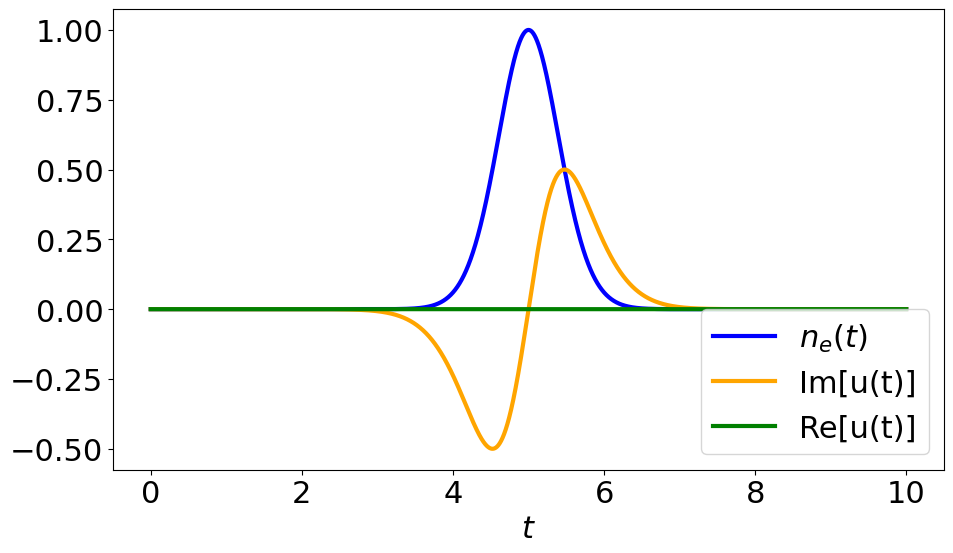

In [12]:
#plt.plot(tlist, yexact, 'b', label = 'Exact solution')
#plt.plot(tlist, y[:,2], 'r', label = 'Forward Euler')
plt.plot(tlist, yrk4[:,2], color = 'blue', linewidth = 3, label = '$n_e(t)$')
plt.plot(tlist, yrk4[:,1], color = 'orange', linewidth = 3, label = 'Im[u(t)]')
plt.plot(tlist, yrk4[:,0], color = 'green',linewidth = 3,  label = 'Re[u(t)]')

plt.legend(loc='lower right')
plt.xlabel('$t$')
#plt.ylabel('$u(t)$')
plt.tight_layout()
plt.savefig('Q2', dpi=1200, bbox_inches="tight")
